Reference
[1] https://www.geeksforgeeks.org/detect-and-remove-the-outliers-using-python/

In [270]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
import numpy as np

In [271]:
df = pd.read_csv("bmw.csv")
pd.set_option('display.max_columns',None)
df.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,5 Series,2014,11200,Automatic,67068,Diesel,125,57.6,2.0
1,6 Series,2018,27000,Automatic,14827,Petrol,145,42.8,2.0
2,5 Series,2016,16000,Automatic,62794,Diesel,160,51.4,3.0
3,1 Series,2017,12750,Automatic,26676,Diesel,145,72.4,1.5
4,7 Series,2014,14500,Automatic,39554,Diesel,160,50.4,3.0


In [272]:
#checking missing values
df.isna().sum()

model           0
year            0
price           0
transmission    0
mileage         0
fuelType        0
tax             0
mpg             0
engineSize      0
dtype: int64

In [273]:
df.shape

(10781, 9)

In [274]:
df.model.unique()

array([' 5 Series', ' 6 Series', ' 1 Series', ' 7 Series', ' 2 Series',
       ' 4 Series', ' X3', ' 3 Series', ' X5', ' X4', ' i3', ' X1', ' M4',
       ' X2', ' X6', ' 8 Series', ' Z4', ' X7', ' M5', ' i8', ' M2',
       ' M3', ' M6', ' Z3'], dtype=object)

In [275]:
df.year.unique()

array([2014, 2018, 2016, 2017, 2015, 2019, 2013, 2020, 2002, 2004, 2007,
       2008, 2011, 2012, 2009, 2006, 2010, 2003, 2001, 2005, 2000, 1999,
       1996, 1997, 1998], dtype=int64)

In [276]:
df.transmission.unique()

array(['Automatic', 'Manual', 'Semi-Auto'], dtype=object)

In [277]:
df.fuelType.unique()

array(['Diesel', 'Petrol', 'Other', 'Hybrid', 'Electric'], dtype=object)

In [278]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10781 entries, 0 to 10780
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10781 non-null  object 
 1   year          10781 non-null  int64  
 2   price         10781 non-null  int64  
 3   transmission  10781 non-null  object 
 4   mileage       10781 non-null  int64  
 5   fuelType      10781 non-null  object 
 6   tax           10781 non-null  int64  
 7   mpg           10781 non-null  float64
 8   engineSize    10781 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 758.2+ KB


# Each fuel type have different config, That's why separate them

In [279]:

df_with_oil = df[(df['fuelType'] =='Diesel') | (df['fuelType'] =='Petrol')].sort_values(by=['year'])
df_with_hybrid = df[(df['fuelType'] =='Hybrid')].sort_values(by=['year'])
df_with_electric = df[(df['fuelType'] =='Electric')].sort_values(by=['year'])
df_with_other = df[(df['fuelType'] =='Other')].sort_values(by=['year'])
((df_with_oil.shape),(df_with_hybrid.shape),(df_with_electric.shape),(df_with_other.shape))

((10444, 9), (298, 9), (3, 9), (36, 9))

# Outlier detection
 

1. Data visualization
2. Statistical test (z scores)
3. Interquartile range method (IQR)

In [280]:
def boxploting (data):
    sns.boxplot(data)
    
def scatterploting(x_data, y_data):
    # Scatter plot
    fig, ax = plt.subplots(figsize = (18,10))
    ax.scatter(x_data , y_data)
 
    # x-axis label
    ax.set_xlabel(x_data.name)
 
    # y-axis label
    ax.set_ylabel(y_data.name)
    plt.show()
    
def statistical_z_value(data):
    z = np.abs(stats.zscore(data))
    # Position of the outlier
    index = np.where(z > 3)
    print("Index of those value where z values are greater than 3 =",index ,"\n")
    return index

def IQR(data):
    Q1 = np.percentile(data, 25,
                   interpolation = 'midpoint')
 
    Q3 = np.percentile(data, 75,
                   interpolation = 'midpoint')
    IQR = Q3 - Q1

    # Above Upper bound
    upper = data >= (Q3+1.5*IQR)
 
    #print("Upper bound:",upper)
    upper_index = np.where(upper)
    print("Upper index = ",np.where(upper),'\n')
 
    # Below Lower bound
    lower = data <= (Q1-1.5*IQR)
    #print("Lower bound:", lower)
    lower_index =  np.where(lower)
    print("Lower index ", np.where(lower),'\n')
    return upper_index, lower_index

# implement a class to optimize the code

In [281]:
class column_outlier_check:
    def __init__(self, check_column, with_column):
        self.check_column = check_column
        self.with_column = with_column
        boxploting(check_column)
        scatterploting(check_column,with_column)
        
        
    def anomaly_check(self):
        indexes_based_on_z = statistical_z_value(self.check_column)
        upper_index , lower_index = IQR(self.check_column)
        iqr_result_index = np.hstack((upper_index, lower_index))
        most_syspected = np.intersect1d(indexes_based_on_z, iqr_result_index)
        print("\nIn upper index and lower index you are seeing the outlier indexes which are shown in boxplot\n\n")
        print("\nMost suspected anomaly based on the z value and IQR result common indexes = ", most_syspected,'\n')       

# OUTLIERS
By visualizing the box plot upper bound and lower bond user can understand the outlier. Here I also implement a statistical measure of z value and Inter quartile range also combine this two if there any common value so that user can confidently take their decision for anomaly

# Oil based cars

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


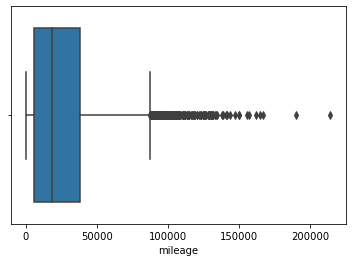

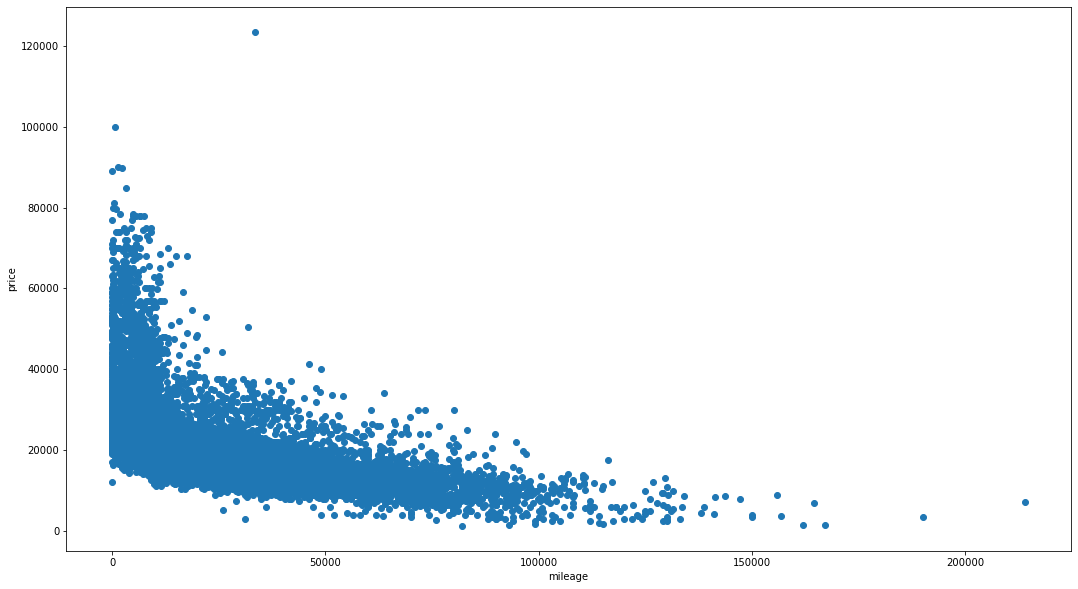

Index of those value where z values are greater than 3 = (array([  15,   17,   22,   24,   25,   29,   33,   34,   42,   43,   51,
         53,   54,   57,   59,   60,   63,   65,   68,   70,   72,   78,
         79,   83,   92,   93,   95,   99,  103,  104,  107,  109,  112,
        114,  137,  138,  139,  140,  144,  148,  149,  152,  157,  160,
        169,  174,  184,  191,  192,  195,  236,  258,  279,  283,  292,
        294,  325,  367,  416,  440,  580,  690,  736,  758,  827,  830,
        863,  866,  912,  916,  926,  944,  991, 1026, 1031, 1034, 1035,
       1039, 1172, 1333, 1388, 1407, 1409, 1421, 1443, 1493, 1508, 1530,
       1533, 1534, 1615, 1616, 1671, 1689, 1691, 1834, 1917, 1919, 1923,
       1934, 1981, 2480, 2509, 3012, 3021, 3058, 3066, 3108, 3109, 3546,
       3840, 3844, 4263, 4333], dtype=int64),) 

Upper index =  (array([   7,    8,   11,   12,   15,   17,   22,   24,   25,   27,   29,
         31,   33,   34,   40,   42,   43,   44,   46,   47,   48,   49,
 

In [282]:
oil_cars_mil = column_outlier_check(df_with_oil['mileage'], df_with_oil['price'])
oil_cars_mil.anomaly_check()

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


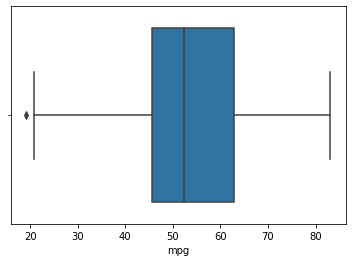

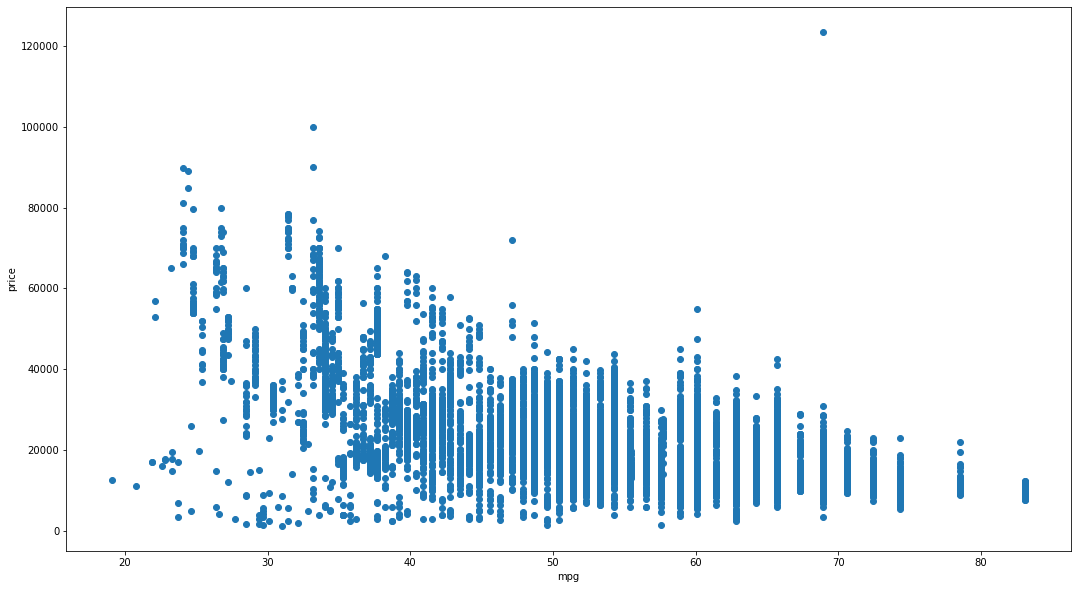

Index of those value where z values are greater than 3 = (array([], dtype=int64),) 

Upper index =  (array([], dtype=int64),) 

Lower index  (array([46], dtype=int64),) 


In upper index and lower index you are seeing the outlier indexes which are shown in boxplot



Most suspected anomaly based on the z value and IQR result common indexes =  [] 



In [283]:
oil_cars_mpg = column_outlier_check(df_with_oil['mpg'], df_with_oil['price'])
oil_cars_mpg.anomaly_check()

DECISION
1. MILEAGE: For oil based cars we can see in the box plot that above 170000 mileage data point can be outlier because there data points are not relatable with other data points. It also prove on the scatter plot that lower price oil based cars have massive mileage. also this data points indexes are shown in the cells output also using z score and IQR calculation.

2. MPG: In box plot we can see that below 20 mpg are the outlier and it also prove in the IQR calculation. 

# Hybrid Cars

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


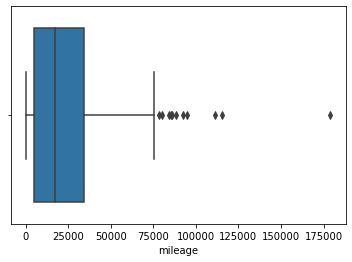

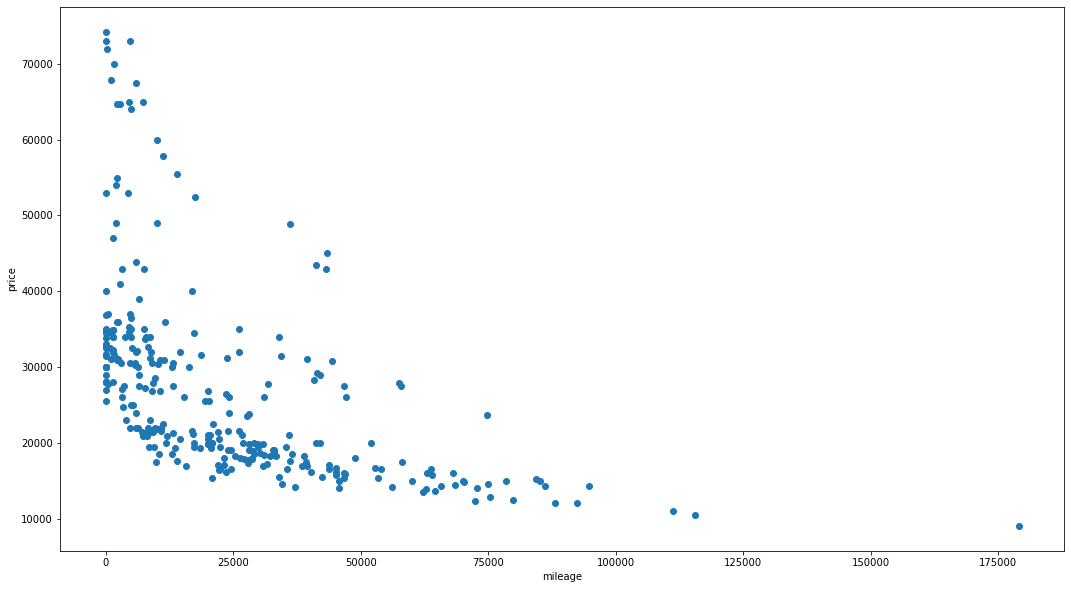

Index of those value where z values are greater than 3 = (array([ 0, 79, 82], dtype=int64),) 

Upper index =  (array([  0,  12,  24,  60,  62,  79,  82,  89, 108, 117, 118], dtype=int64),) 

Lower index  (array([], dtype=int64),) 


In upper index and lower index you are seeing the outlier indexes which are shown in boxplot



Most suspected anomaly based on the z value and IQR result common indexes =  [ 0 79 82] 



In [284]:
hybrid_cars_mil = column_outlier_check(df_with_hybrid['mileage'], df_with_hybrid['price'])
hybrid_cars_mil.anomaly_check()

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


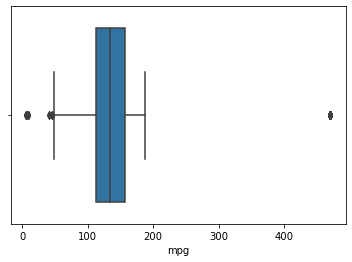

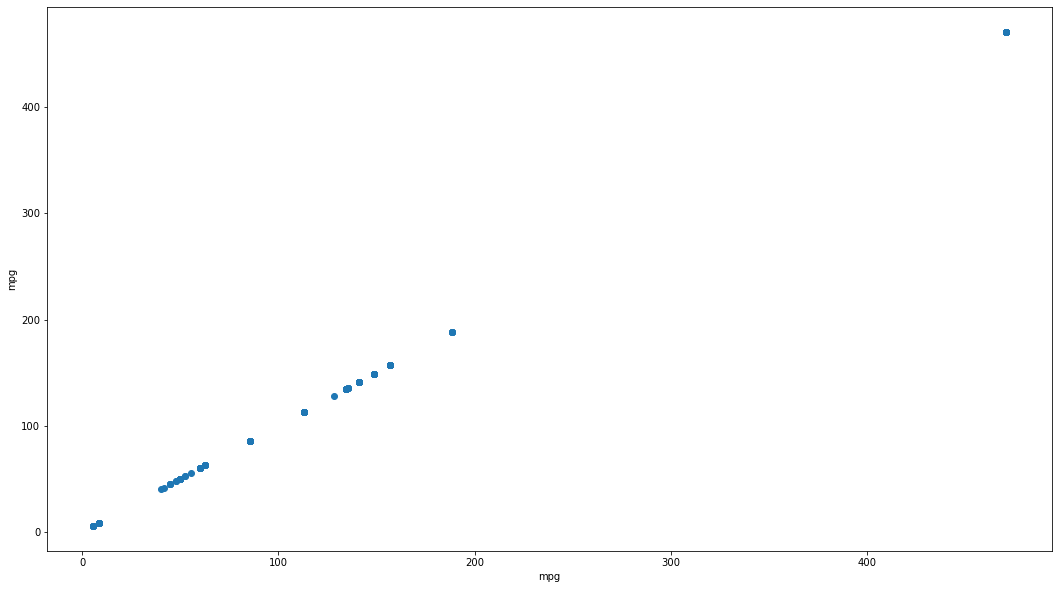

Index of those value where z values are greater than 3 = (array([], dtype=int64),) 

Upper index =  (array([  2,   3,   4,   7,   9,  10,  12,  21,  37,  59,  64,  65,  68,
        87,  91,  94,  95,  97,  98,  99, 103, 104, 105, 109, 110, 114,
       119, 130, 131, 134, 137, 146, 148], dtype=int64),) 

Lower index  (array([  0,   1, 188, 205, 224, 225, 242, 243, 255, 259, 267, 270, 271,
       274, 275, 276, 279, 280, 281, 297], dtype=int64),) 


In upper index and lower index you are seeing the outlier indexes which are shown in boxplot



Most suspected anomaly based on the z value and IQR result common indexes =  [] 



In [285]:
hybrid_cars_mpg = column_outlier_check(df_with_hybrid['mpg'], df_with_hybrid['mpg'])
hybrid_cars_mpg.anomaly_check()

DECISION:

1. MILEAGE: In the box plot, it shows that above 100000 mileage are outlier. This data points' indexes shows also in the z score and IQR. 

2. MPG: In the box plot, it shows that below 40 and above 400 mpg data points are outlier and those indexes are also show in IQR upper and lower indexes

# Electric car

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


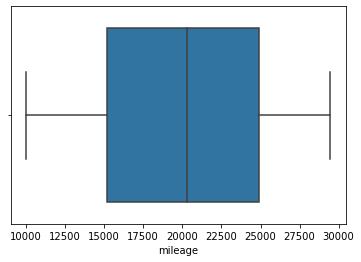

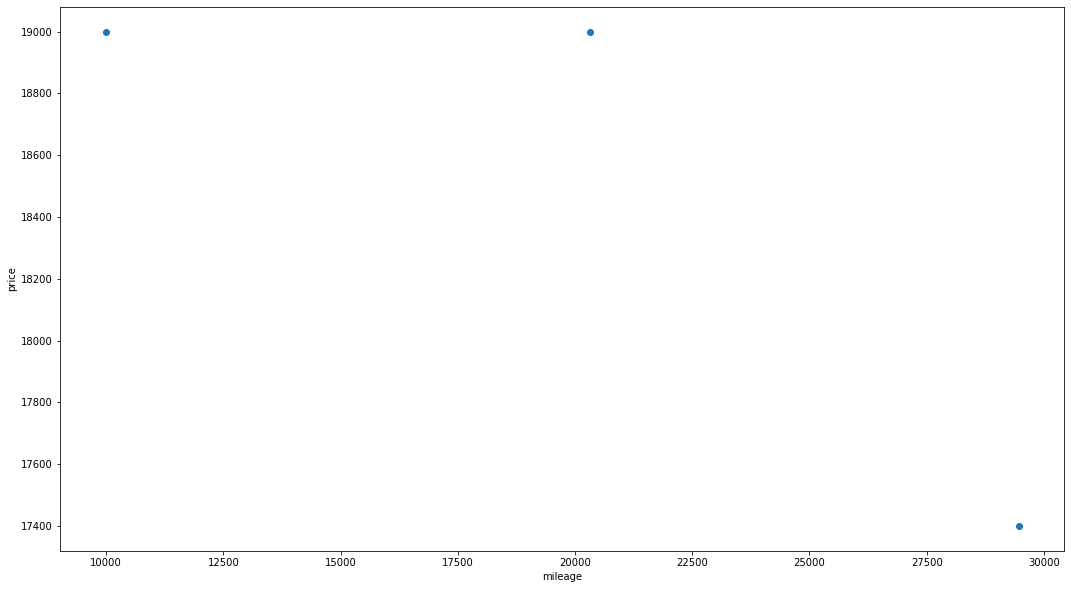

Index of those value where z values are greater than 3 = (array([], dtype=int64),) 

Upper index =  (array([], dtype=int64),) 

Lower index  (array([], dtype=int64),) 


In upper index and lower index you are seeing the outlier indexes which are shown in boxplot



Most suspected anomaly based on the z value and IQR result common indexes =  [] 



In [286]:
electric_cars_mil = column_outlier_check(df_with_electric['mileage'], df_with_electric['price'])
electric_cars_mil.anomaly_check()

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


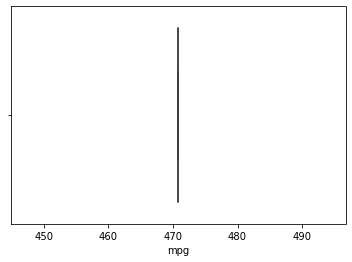

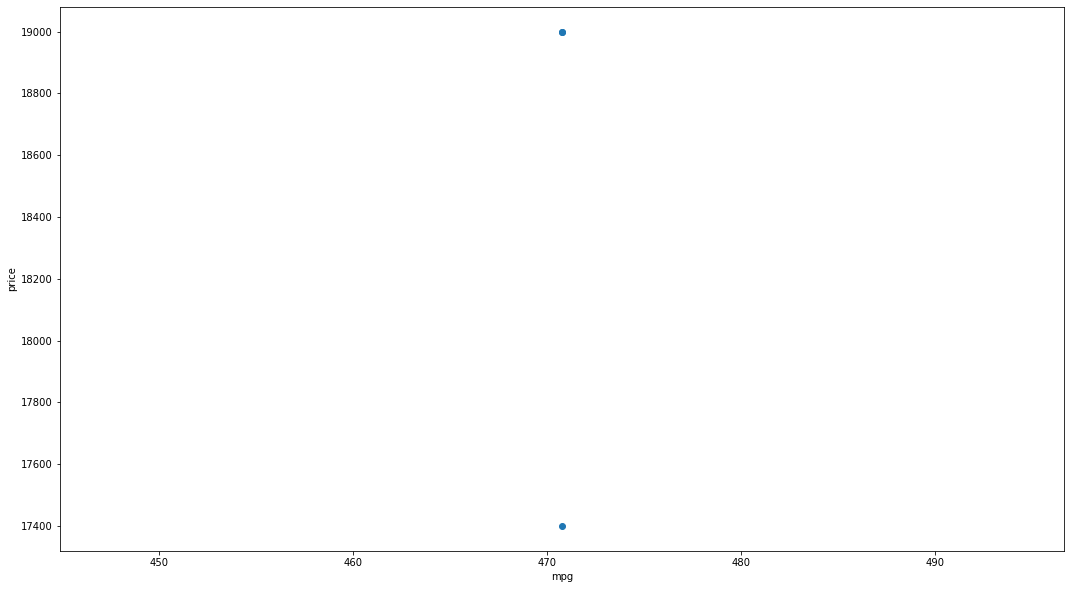

Index of those value where z values are greater than 3 = (array([], dtype=int64),) 

Upper index =  (array([0, 1, 2], dtype=int64),) 

Lower index  (array([0, 1, 2], dtype=int64),) 


In upper index and lower index you are seeing the outlier indexes which are shown in boxplot



Most suspected anomaly based on the z value and IQR result common indexes =  [] 



In [287]:
#This is not much meaning full because we have only 3 data point
electric_cars_mpg = column_outlier_check(df_with_electric['mpg'], df_with_electric['price'])
electric_cars_mpg.anomaly_check()

DECISION:

1. MILEAGE: There is no outlier
2. MPG: electric cars have miles per gallon value that is unrealistic so those three values are anomaly

# Other Cars

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


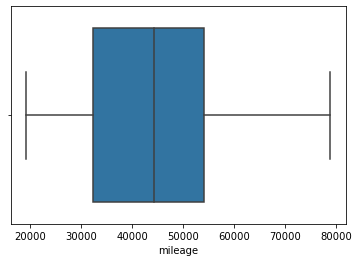

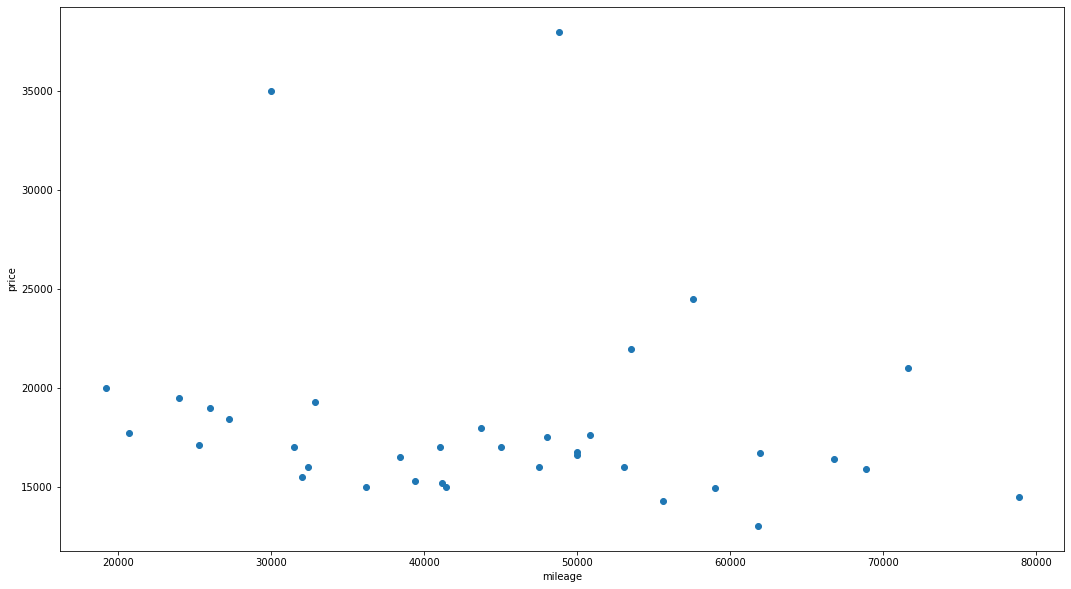

Index of those value where z values are greater than 3 = (array([], dtype=int64),) 

Upper index =  (array([], dtype=int64),) 

Lower index  (array([], dtype=int64),) 


In upper index and lower index you are seeing the outlier indexes which are shown in boxplot



Most suspected anomaly based on the z value and IQR result common indexes =  [] 



In [288]:
other_cars_mil = column_outlier_check(df_with_other['mileage'], df_with_other['price'])
other_cars_mil.anomaly_check()

C:\Users\tanvi\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


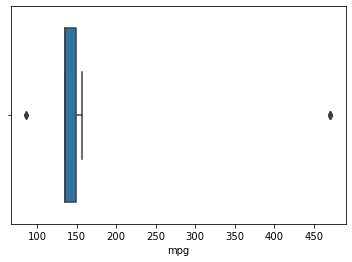

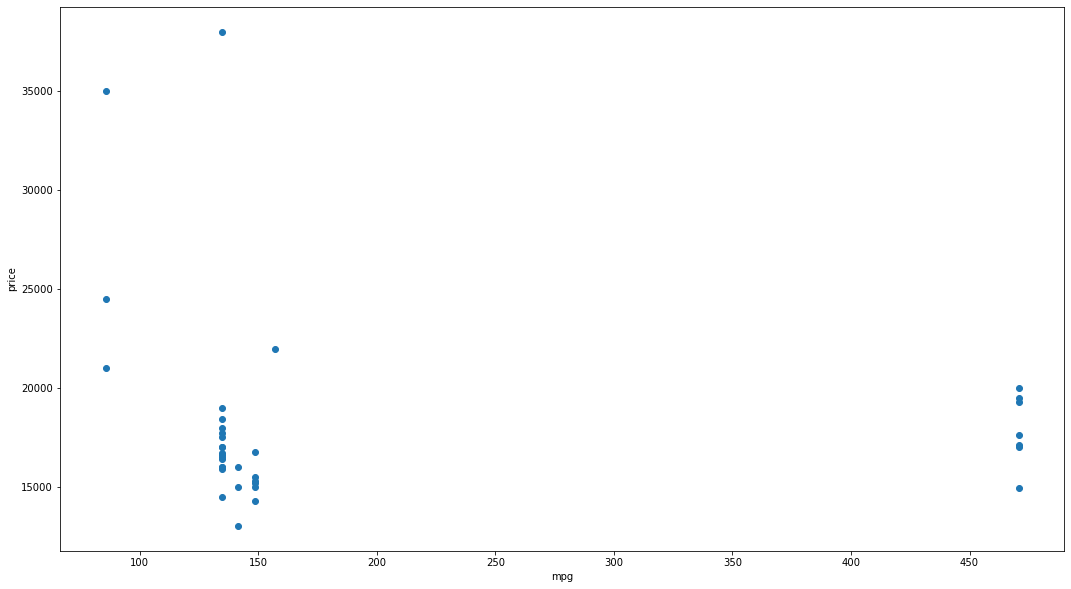

Index of those value where z values are greater than 3 = (array([], dtype=int64),) 

Upper index =  (array([ 1,  3, 11, 18, 20, 22, 27], dtype=int64),) 

Lower index  (array([ 5,  6, 34], dtype=int64),) 


In upper index and lower index you are seeing the outlier indexes which are shown in boxplot



Most suspected anomaly based on the z value and IQR result common indexes =  [] 



In [289]:
other_cars_mpg = column_outlier_check(df_with_other['mpg'], df_with_other['price'])
other_cars_mpg.anomaly_check()

DECISION:

1. MILEAGE: There is no outlier.

2. MPG: boxplot shows that below 100 and above 400 mpg data points are outlier and those data points' indexes are shown in IQR calculation